In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## data familiarization

### Discovering what is inside the provided files.

5 csv files to be explored:


In [2]:
country_series = pd.read_csv('./Edstats_csv/EdStatsCountry-Series.csv')
country = pd.read_csv('./Edstats_csv/EdStatsCountry.csv')
data = pd.read_csv('./Edstats_csv/EdStatsData.csv')
footnote = pd.read_csv('./Edstats_csv/EdStatsFootNote.csv')
series = pd.read_csv('./Edstats_csv/EdStatsSeries.csv')

------------------------------
COUNTRY_SERIES


,CountryCode,SeriesCode,DESCRIPTION,Unnamed: 3
0,ABW,SP.POP.TOTL,Data sources : United Nations World Population...,NaN
1,ABW,SP.POP.GROW,Data sources: United Nations World Population ...,NaN
2,AFG,SP.POP.GROW,Data sources: United Nations World Population ...,NaN
3,AFG,NY.GDP.PCAP.PP.CD,Estimates are based on regression.,NaN
4,AFG,SP.POP.TOTL,Data sources : United Nations World Population...,NaN


Dimensions :	(613, 4)

types CountryCode     object
SeriesCode      object
DESCRIPTION     object
Unnamed: 3     float64
dtype: object

Percentage of NaN per variable :


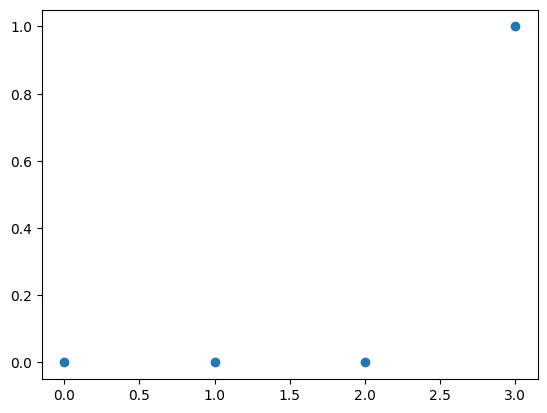

------------------------------
COUNTRY


,Country Code,Short Name,Table Name,Long Name,2-alpha code,Currency Unit,Special Notes,Region,Income Group,WB-2 code,...,IMF data dissemination standard,Latest population census,Latest household survey,Source of most recent Income and expenditure data,Vital registration complete,Latest agricultural census,Latest industrial data,Latest trade data,Latest water withdrawal data,Unnamed: 31
0,ABW,Aruba,Aruba,Aruba,AW,Aruban florin,SNA data for 2000-2011 are updated from offici...,Latin America & Caribbean,High income: nonOECD,AW,...,NaN,2010,NaN,NaN,Yes,NaN,NaN,2012.0,NaN,NaN
1,AFG,Afghanistan,Afghanistan,Islamic State of Afghanistan,AF,Afghan afghani,Fiscal year end: March 20; reporting period fo...,South Asia,Low income,AF,...,General Data Dissemination System (GDDS),1979,"Multiple Indicator Cluster Survey (MICS), 2010/11","Integrated household survey (IHS), 2008",NaN,2013/14,NaN,2012.0,2000,NaN
2,AGO,Angola,Angola,People's Republic of Angola,AO,Angolan kwanza,"April 2013 database update: Based on IMF data,...",Sub-Saharan Africa,Upper middle income,AO,...,General Data Dissemination System (GDDS),1970,"Malaria Indicator Survey (MIS), 2011","Integrated household survey (IHS), 2008",NaN,2015,NaN,NaN,2005,NaN
3,ALB,Albania,Albania,Republic of Albania,AL,Albanian lek,NaN,Europe & Central Asia,Upper middle income,AL,...,General Data Dissemination System (GDDS),2011,"Demographic and Health Survey (DHS), 2008/09",Living Standards Measurement Study Survey (LSM...,Yes,2012,2010.0,2012.0,2006,NaN
4,AND,Andorra,Andorra,Principality of Andorra,AD,Euro,NaN,Europe & Central Asia,High income: nonOECD,AD,...,NaN,2011. Population figures compiled from adminis...,NaN,NaN,Yes,NaN,NaN,2006.0,NaN,NaN


Dimensions :	(241, 32)

types Country Code                                          object
Short Name                                            object
Table Name                                            object
Long Name                                             object
2-alpha code                                          object
Currency Unit                                         object
Special Notes                                         object
Region                                                object
Income Group                                          object
WB-2 code                                             object
National accounts base year                           object
National accounts reference year                     float64
SNA price valuation                                   object
Lending category                                      object
Other groups                                          object
System of National Accounts                           o

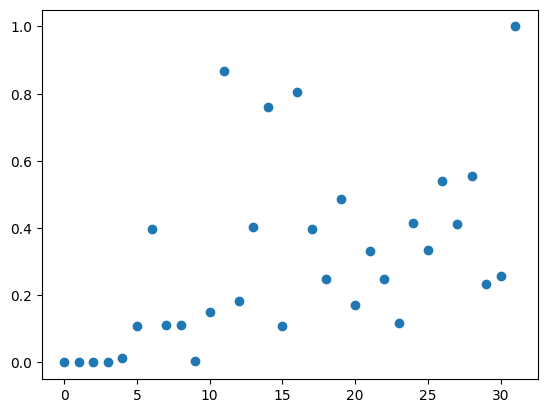

------------------------------
DATA


,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,...,2060,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69
0,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.F,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.GPI,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.M,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Arab World,ARB,"Adjusted net enrolment rate, primary, both sex...",SE.PRM.TENR,54.822121,54.894138,56.209438,57.267109,57.991138,59.36554,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Dimensions :	(886930, 70)

types Country Name       object
Country Code       object
Indicator Name     object
Indicator Code     object
1970              float64
                   ...   
2085              float64
2090              float64
2095              float64
2100              float64
Unnamed: 69       float64
Length: 70, dtype: object

Percentage of NaN per variable :


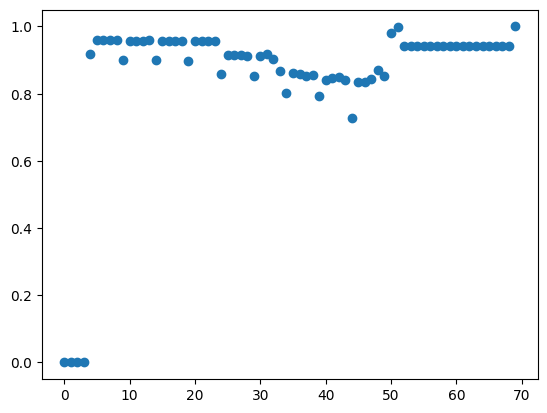

------------------------------
FOOTNOTE


,CountryCode,SeriesCode,Year,DESCRIPTION,Unnamed: 4
0,ABW,SE.PRE.ENRL.FE,YR2001,Country estimation.,NaN
1,ABW,SE.TER.TCHR.FE,YR2005,Country estimation.,NaN
2,ABW,SE.PRE.TCHR.FE,YR2000,Country estimation.,NaN
3,ABW,SE.SEC.ENRL.GC,YR2004,Country estimation.,NaN
4,ABW,SE.PRE.TCHR,YR2006,Country estimation.,NaN


Dimensions :	(643638, 5)

types CountryCode     object
SeriesCode      object
Year            object
DESCRIPTION     object
Unnamed: 4     float64
dtype: object

Percentage of NaN per variable :


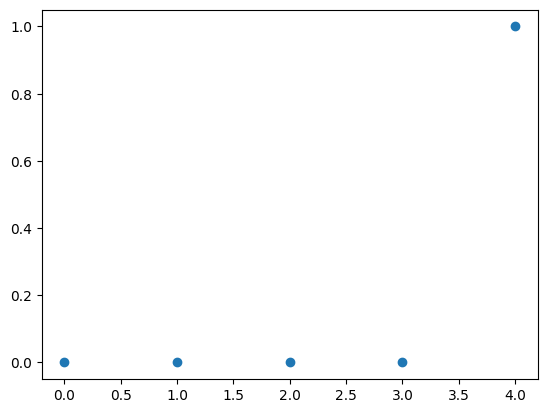

------------------------------
SERIES


,Series Code,Topic,Indicator Name,Short definition,Long definition,Unit of measure,Periodicity,Base Period,Other notes,Aggregation method,...,Notes from original source,General comments,Source,Statistical concept and methodology,Development relevance,Related source links,Other web links,Related indicators,License Type,Unnamed: 20
0,BAR.NOED.1519.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 15-19 with...,Percentage of female population age 15-19 with...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BAR.NOED.1519.ZS,Attainment,Barro-Lee: Percentage of population age 15-19 ...,Percentage of population age 15-19 with no edu...,Percentage of population age 15-19 with no edu...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,BAR.NOED.15UP.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 15+ with n...,Percentage of female population age 15+ with n...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,BAR.NOED.15UP.ZS,Attainment,Barro-Lee: Percentage of population age 15+ wi...,Percentage of population age 15+ with no educa...,Percentage of population age 15+ with no educa...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,BAR.NOED.2024.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 20-24 with...,Percentage of female population age 20-24 with...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Dimensions :	(3665, 21)

types Series Code                             object
Topic                                   object
Indicator Name                          object
Short definition                        object
Long definition                         object
Unit of measure                        float64
Periodicity                             object
Base Period                             object
Other notes                             object
Aggregation method                      object
Limitations and exceptions              object
Notes from original source             float64
General comments                        object
Source                                  object
Statistical concept and methodology     object
Development relevance                   object
Related source links                    object
Other web links                        float64
Related indicators                     float64
License Type                           float64
Unnamed: 20                  

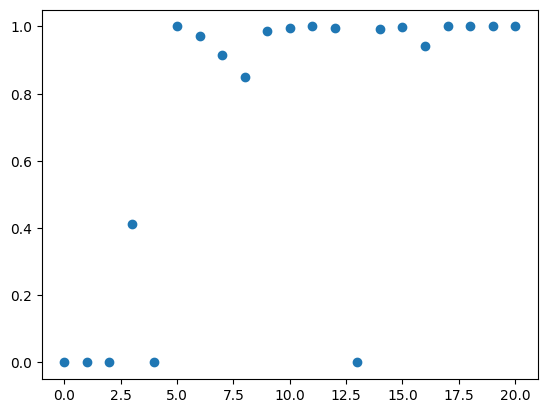

In [65]:
names = ["country_series", "country", "data", "footnote", "series"]

for name in names:
    print("-"*30)
    print(name.upper())
    df = eval(name)
    display(df.head())
    print(f'Dimensions :\t{df.shape}\n')
    print(f'types {df.dtypes}')
    labels = df.columns
    x = range(df.shape[1])
    y = df.isnull().mean()
    print('')
    print("Percentage of NaN per variable :")
    plt.scatter(x, y)
    plt.show()
       

In [27]:
# series_cleaned = (series.T.loc[y < 95]).T 
# # .T transposition to ensure indexes correspondance. 
# Commented because I should first focus on the 'data' DF.

### Ascertainments :

- *COUNTRY_SERIES* : seems to be exhaustive.
- *COUNTRY* : information on countries. 
- *DATA* : 
    - High percentage of emptiness.
    - 886930 lines of data.
    - Years going from 1970 to 2100 assessments.
    - I will focus on the era 2000-2030 and may be I'll even be more restrictive at some point?
- *FOOTNOTE* : exhaustive.
- *SERIES* : exhaustive in the first 3 variables, which seem to be the most important.
- For each dataset, the last variable can be removed.

## Let's focus on 'data'


In [33]:
data.columns

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978',
       '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987',
       '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996',
       '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015', '2016', '2017', '2020', '2025', '2030', '2035', '2040', '2045',
       '2050', '2055', '2060', '2065', '2070', '2075', '2080', '2085', '2090',
       '2095', '2100', 'Unnamed: 69'],
      dtype='object')

In [271]:
# Cleaning text formats to search for duplicates
text_indicators = data.columns[0:4]
for indicator in text_indicators:
    data[indicator] = data[indicator].str.strip().str.lower()

In [276]:
# Searching for duplicates. (same statistics in the same country)
sum(data[['Country Name','Indicator Name']].duplicated(keep=False))

0

We found no duplicates.

### Reducing the dataset focusing on the contemporary era.

In [34]:
# Apparently, some measured data are available between 1970 and 2017, each year.
# After that, it seems that we have assessments, each 5 years.
# I limit the study from 2000 to 2030.

contemporary_data = data.loc[:,['Country Name', 'Country Code', 'Indicator Name',
                              'Indicator Code','2000', '2001', '2002', '2003',
                              '2004', '2005', '2006', '2007', '2008', '2009',
                              '2010','2011', '2012', '2013', '2014', '2015',
                              '2016', '2017', '2020', '2025', '2030']]

In [31]:
contemporary_data.isnull().sum() / len(contemporary_data)
# NaN proportions.

Country Name      0.000000
Country Code      0.000000
Indicator Name    0.000000
Indicator Code    0.000000
2000              0.800801
2001              0.860745
2002              0.859961
2003              0.853018
2004              0.854764
2005              0.792421
2006              0.841800
2007              0.845228
2008              0.848481
2009              0.839775
2010              0.726650
2011              0.835374
2012              0.833962
2013              0.844961
2014              0.871705
2015              0.852234
2016              0.981442
2017              0.999839
2020              0.942007
2025              0.942007
2030              0.942007
dtype: float64

In [35]:
# It seems that we have a tiny bit more information on multiple-of-5-years.
# Focus on 2010-2017.
# Counting how many values were given during this period for each individual.
contemporary_data['n_values_2010->2017'] = [row.count() 
                                            for ind,row
                                            in contemporary_data.loc[:,'2010':'2017'].iterrows()]

In [42]:
contemporary_data.to_csv('data_2000_2030.csv')

<AxesSubplot: xlabel='n_values_2010->2017'>

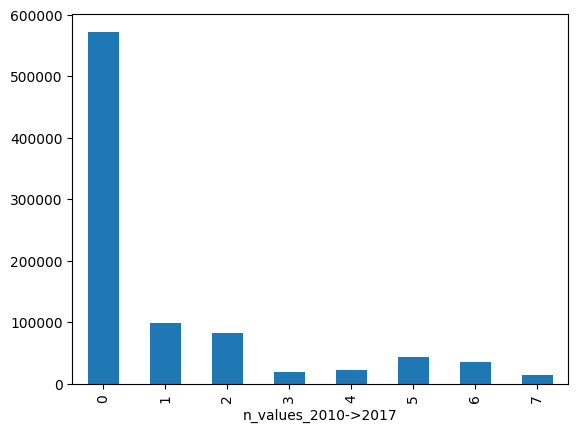

In [40]:
contemporary_data.groupby('n_values_2010->2017')['n_values_2010->2017'].agg(len).plot(kind='bar')

In [44]:
# As a first approach, I consider that an individual holds decent information 
# if there are at least 5 values in that period.
contemporary_data = contemporary_data.loc[contemporary_data['n_values_2010->2017'] >= 5,:]
contemporary_data.head(5)


,Country Name,Country Code,Indicator Name,Indicator Code,2000,2001,2002,2003,2004,2005,...,2012,2013,2014,2015,2016,2017,2020,2025,2030,n_values_2010->2017
4,Arab World,ARB,"Adjusted net enrolment rate, primary, both sex...",SE.PRM.TENR,77.245682,78.800522,80.051399,80.805389,81.607063,82.489487,...,86.101669,85.511940,85.320152,NaN,NaN,NaN,NaN,NaN,NaN,5
5,Arab World,ARB,"Adjusted net enrolment rate, primary, female (%)",SE.PRM.TENR.FE,73.275620,75.132980,76.641022,77.653580,78.485397,79.475769,...,84.401413,83.914032,83.820831,NaN,NaN,NaN,NaN,NaN,NaN,5
6,Arab World,ARB,"Adjusted net enrolment rate, primary, gender p...",UIS.NERA.1.GPI,0.904060,0.912750,0.919790,0.926300,0.927680,0.930840,...,0.962080,0.964090,0.966200,NaN,NaN,NaN,NaN,NaN,NaN,5
7,Arab World,ARB,"Adjusted net enrolment rate, primary, male (%)",SE.PRM.TENR.MA,81.051369,82.315048,83.324059,83.832230,84.604393,85.380287,...,87.728172,87.039879,86.753387,NaN,NaN,NaN,NaN,NaN,NaN,5
12,Arab World,ARB,Adjusted net intake rate to Grade 1 of primary...,UIS.NIRA.1,70.737579,73.594200,74.976158,75.328583,76.428513,76.131767,...,77.319366,76.566711,76.620567,NaN,NaN,NaN,NaN,NaN,NaN,5


93081

In [3]:
#contemporary_data.to_csv('data_with_info_2010-2017.csv')
# Here I rename contemporary_data in cdata to improve readability
# and try to stick to PEP8. 
cdata = pd.read_csv('data_with_info_2010-2017.csv')

In [5]:
cdata.shape

(93081, 27)

In [6]:
# Doing this last filtering, I discarded almost 90% of the data. 
# Initially 886_930 lines, now 93_081.

In [12]:
# searching for indicator relating information on a large amount of countries
data_per_indicator = cdata.groupby(['Indicator Name'])['Country Code'].agg(len)
data_per_indicator

Indicator Name
adjusted net enrolment rate, lower secondary, both sexes (%)                47
adjusted net enrolment rate, lower secondary, female (%)                    45
adjusted net enrolment rate, lower secondary, gender parity index (gpi)     45
adjusted net enrolment rate, lower secondary, male (%)                      45
adjusted net enrolment rate, primary, both sexes (%)                       129
                                                                          ... 
youth illiterate population, 15-24 years, male (number)                     27
youth literacy rate, population 15-24 years, both sexes (%)                 34
youth literacy rate, population 15-24 years, female (%)                     34
youth literacy rate, population 15-24 years, gender parity index (gpi)      34
youth literacy rate, population 15-24 years, male (%)                       34
Name: Country Code, Length: 1205, dtype: int64

In [13]:
sum(data_per_indicator > 50) / len(data_per_indicator)
# Half of the 1205 indicators concern at least 50 countries.

0.5053941908713693

In [14]:
#searching for indicators to prospect potential markets for Academy.
key_words = ['online',
             'learner',
             'programming',
             'mail',
             'software',
             'computer',
             'network',
             '15-24']
# in cdata            
for kw in key_words:             
    print('-'*40)
    print(f"key-word : {kw}")
    print('')
    print(cdata.loc[cdata['Indicator Name'].str.contains(kw, case=False),
          'Indicator Name'])

----------------------------------------
key-word : online

Series([], Name: Indicator Name, dtype: object)
----------------------------------------
key-word : learner

Series([], Name: Indicator Name, dtype: object)
----------------------------------------
key-word : programming

Series([], Name: Indicator Name, dtype: object)
----------------------------------------
key-word : mail

Series([], Name: Indicator Name, dtype: object)
----------------------------------------
key-word : software

Series([], Name: Indicator Name, dtype: object)
----------------------------------------
key-word : computer

Series([], Name: Indicator Name, dtype: object)
----------------------------------------
key-word : network

Series([], Name: Indicator Name, dtype: object)
----------------------------------------
key-word : 15-24

277      youth illiterate population, 15-24 years, % fe...
278      youth illiterate population, 15-24 years, both...
279      youth illiterate population, 15-24 years, fema...

In [15]:
# let's find out if we omitted something partially given in the
# original dataset.            
for kw in key_words:             
    print('-'*40)
    print(f"key-word : {kw}")
    print('')
    print(data.loc[data['Indicator Name'].str.contains(kw, case=False),
          'Indicator Name'])

----------------------------------------
key-word : online

Series([], Name: Indicator Name, dtype: object)
----------------------------------------
key-word : learner

Series([], Name: Indicator Name, dtype: object)
----------------------------------------
key-word : programming

Series([], Name: Indicator Name, dtype: object)
----------------------------------------
key-word : mail

Series([], Name: Indicator Name, dtype: object)
----------------------------------------
key-word : software

Series([], Name: Indicator Name, dtype: object)
----------------------------------------
key-word : computer

2084                    Personal computers (per 100 people)
2102      PIAAC: Adults by proficiency level in problem ...
2103      PIAAC: Adults by proficiency level in problem ...
2139      PIAAC: Female adults by proficiency level in p...
2154      PIAAC: Male adults by proficiency level in pro...
                                ...                        
885368    PIAAC: Adults by profi

We could possibly miss something considering only cdata, but only
'computer' and 'population' wise. Other keywords gave no result.

### FOCUS ON POPULATION in cdata (should be enough).

In [16]:
# Let's learn more about the population indicators that we could
# get access to. I search among 'Long definition' in the series
# csv (so I can filter the topic) assuming that the potential
# clients of Academy will mainly be young people going to college
# or university (tertiary or post-secondary) and thus aged around 15-30.
s = ''
for i in range(15,31):
   s = s + str(i) + '|'

pop_kw = s + 'post-secondary|tertiary' 
pop_kw

'15|16|17|18|19|20|21|22|23|24|25|26|27|28|29|30|post-secondary|tertiary'

In [18]:
pop_indicators = series.loc[series.Topic.str.contains('Pop')
                            & (~series['Long definition']
                               .str.contains('male', case=False)) # No male, nor female only.
                            & (series['Long definition']
                               .str.contains(pop_kw, case=False))
                            ]

In [19]:
for ind, row in pop_indicators.iterrows():
    print(row['Long definition'])

Population, ages 10-15, total is the total population age 10-15.
Population, ages 10-16, total is the total population age 10-16.
Population, ages 10-17, total is the total population age 10-17.
Population, ages 10-18, total is the total population age 10-18.
Population, ages 11-15, total is the total population age 11-15.
Population, ages 11-16, total is the total population age 11-16.
Population, ages 11-17, total is the total population age 11-17.
Population, ages 11-18, total is the total population age 11-18.
Population, ages 12-15, total is the total population age 12-15.
Population, ages 12-16, total is the total population age 12-16.
Population, ages 12-17, total is the total population age 12-17.
Population, ages 12-18, total is the total population age 12-18.
Population, ages 13-16, total is the total population age 13-16.
Population, ages 13-17, total is the total population age 13-17.
Population, ages 13-18, total is the total population age 13-18.
Population, ages 13-19, t

'Population, ages 15-24, total is the total population age 15-24'
and 'Population of the age-group theoretically corresponding to 
tertiary education as indicated by theoretical entrance age and
duration.' are indicators of interest for Academy.

Let's not forget there can be a lot a young pupil in a country, but uneducated, so we will have to check school attendance rate, and these people capability to make use of technology.

May be older person could be interesting clients too, but let's 
not consider them in the first place.

In [52]:
series.columns

Index(['Series Code', 'Topic', 'Indicator Name', 'Short definition',
       'Long definition', 'Unit of measure', 'Periodicity', 'Base Period',
       'Other notes', 'Aggregation method', 'Limitations and exceptions',
       'Notes from original source', 'General comments', 'Source',
       'Statistical concept and methodology', 'Development relevance',
       'Related source links', 'Other web links', 'Related indicators',
       'License Type', 'Unnamed: 20'],
      dtype='object')

In [53]:
# Correspondance between 'long definition' and 'indicator name' 
# to then search in data or cdata.
part_of_def = ('Population, ages 15-24, total'
               + '| corresponding to tertiary education')


ind_names = pop_indicators.loc[pop_indicators['Long definition']
                               .str.contains(part_of_def),
                               'Indicator Name']

ind_properties = pop_indicators.loc[pop_indicators['Long definition']
                                    .str.contains(part_of_def),
                                    :]

In [21]:
for name in ind_names:
    print(name)

Population, ages 15-24, total
Population of the official age for tertiary education, both sexes (number)


In [24]:
s = 'Population, ages 15-24, total'
mask = cdata['Indicator Name'].str.contains(s, case=False)
# If case=True, I dont find anything, may be it would be wiser to use
# indicator code next time...
young_people = cdata.loc[mask, :]

s = 'Population of the official age for tertiary education, both sexes (number)'

mask = cdata['Indicator Name'].str.contains(s, case=False)
tertiary_people = cdata.loc[mask, :]

/tmp/ipykernel_6357/579904438.py:9: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  mask = cdata['Indicator Name'].str.contains(s, case=False)


In [25]:
young_people

,Unnamed: 0,Country Name,Country Code,Indicator Name,Indicator Code,2000,2001,2002,2003,2004,...,2012,2013,2014,2015,2016,2017,2020,2025,2030,n_values_2010->2017
8070,94107,afghanistan,afg,"population, ages 15-24, total",sp.pop.1524.to.un,3979438.0,4122669.0,4293057.0,4486256.0,4694142.0,...,6569239.0,6803785.0,7032072.0,7252785.0,NaN,NaN,NaN,NaN,NaN,6
8580,97772,albania,alb,"population, ages 15-24, total",sp.pop.1524.to.un,538251.0,545188.0,554507.0,565217.0,576075.0,...,594101.0,582411.0,569427.0,556269.0,NaN,NaN,NaN,NaN,NaN,6
9038,101437,algeria,dza,"population, ages 15-24, total",sp.pop.1524.to.un,6901569.0,7049439.0,7176450.0,7280112.0,7358405.0,...,6964424.0,6795040.0,6625398.0,6467818.0,NaN,NaN,NaN,NaN,NaN,6
9566,112432,angola,ago,"population, ages 15-24, total",sp.pop.1524.to.un,2728211.0,2818589.0,2914678.0,3015635.0,3120154.0,...,3972550.0,4067194.0,4162115.0,4259352.0,NaN,NaN,NaN,NaN,NaN,6
10063,119762,argentina,arg,"population, ages 15-24, total",sp.pop.1524.to.un,6558707.0,6583685.0,6589963.0,6587315.0,6588741.0,...,6880259.0,6892160.0,6894149.0,6886530.0,NaN,NaN,NaN,NaN,NaN,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91413,867422,vietnam,vnm,"population, ages 15-24, total",sp.pop.1524.to.un,15932010.0,16238617.0,16558370.0,16883649.0,17204283.0,...,18017444.0,17671710.0,17298090.0,16939813.0,NaN,NaN,NaN,NaN,NaN,6
92090,874752,west bank and gaza,pse,"population, ages 15-24, total",sp.pop.1524.to.un,587801.0,610914.0,637042.0,665435.0,694972.0,...,946780.0,981523.0,1016961.0,1053004.0,NaN,NaN,NaN,NaN,NaN,6
92492,878417,"yemen, rep.",yem,"population, ages 15-24, total",sp.pop.1524.to.un,3684521.0,3854083.0,4026420.0,4200255.0,4374251.0,...,5634854.0,5761692.0,5881653.0,5995687.0,NaN,NaN,NaN,NaN,NaN,6
92747,882082,zambia,zmb,"population, ages 15-24, total",sp.pop.1524.to.un,2175799.0,2227808.0,2277351.0,2325764.0,2374965.0,...,2854607.0,2924614.0,2995938.0,3068044.0,NaN,NaN,NaN,NaN,NaN,6


In [22]:
s = 'Population of the official age for tertiary education, both sexes'

mask = cdata['Indicator Name'].str.contains(s, case=False)
tertiary_people = cdata.loc[mask, :]

In [23]:
tertiary_people

,Unnamed: 0,Country Name,Country Code,Indicator Name,Indicator Code,2000,2001,2002,2003,2004,...,2012,2013,2014,2015,2016,2017,2020,2025,2030,n_values_2010->2017
198,2326,arab world,arb,population of the official age for tertiary ed...,sp.ter.totl.in,28026434.0,28779732.0,29631340.0,30448992.0,31236568.0,...,35486812.0,35450100.0,35373556.0,NaN,NaN,NaN,NaN,NaN,NaN,5
495,5991,east asia & pacific,eas,population of the official age for tertiary ed...,sp.ter.totl.in,163077968.0,162908832.0,164205216.0,166888336.0,170967760.0,...,189351840.0,182887728.0,176505312.0,NaN,NaN,NaN,NaN,NaN,NaN,5
801,9656,east asia & pacific (excluding high income),eap,population of the official age for tertiary ed...,sp.ter.totl.in,148814016.0,148837280.0,150276992.0,153130704.0,157386880.0,...,176766256.0,170370976.0,163993680.0,NaN,NaN,NaN,NaN,NaN,NaN,5
1113,13321,euro area,emu,population of the official age for tertiary ed...,sp.ter.totl.in,20358580.0,20175622.0,20103836.0,20054902.0,19996852.0,...,18853472.0,18594866.0,18368574.0,NaN,NaN,NaN,NaN,NaN,NaN,5
1423,16986,europe & central asia,ecs,population of the official age for tertiary ed...,sp.ter.totl.in,63198288.0,63572848.0,64054076.0,64486784.0,64666152.0,...,61026108.0,59402204.0,57917924.0,NaN,NaN,NaN,NaN,NaN,NaN,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91257,867266,vietnam,vnm,population of the official age for tertiary ed...,sp.ter.totl.in,7778893.0,7911316.0,8063814.0,8197447.0,8317746.0,...,9037252.0,8996475.0,8833084.0,8554144.0,NaN,NaN,NaN,NaN,NaN,6
91934,874596,west bank and gaza,pse,population of the official age for tertiary ed...,sp.ter.totl.in,297732.0,306881.0,314567.0,321454.0,328878.0,...,451438.0,470260.0,486140.0,499101.0,NaN,NaN,NaN,NaN,NaN,6
92336,878261,"yemen, rep.",yem,population of the official age for tertiary ed...,sp.ter.totl.in,1654692.0,1736979.0,1819423.0,1901434.0,1987308.0,...,2781697.0,2865753.0,2926255.0,NaN,NaN,NaN,NaN,NaN,NaN,5
92591,881926,zambia,zmb,population of the official age for tertiary ed...,sp.ter.totl.in,1074103.0,1091997.0,1110077.0,1131888.0,1159347.0,...,1423615.0,1458724.0,1497656.0,NaN,NaN,NaN,NaN,NaN,NaN,5


In [54]:
ind_properties
    

,Series Code,Topic,Indicator Name,Short definition,Long definition,Unit of measure,Periodicity,Base Period,Other notes,Aggregation method,...,Notes from original source,General comments,Source,Statistical concept and methodology,Development relevance,Related source links,Other web links,Related indicators,License Type,Unnamed: 20
2506,SP.POP.1524.TO.UN,Population,"Population, ages 15-24, total","Population, ages 15-24, total is the total pop...","Population, ages 15-24, total is the total pop...",NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,UNESCO Institute for Statistics (Derived),NaN,NaN,NaN,NaN,NaN,NaN,NaN
2614,SP.TER.TOTL.IN,Population,Population of the official age for tertiary ed...,NaN,Population of the age-group theoretically corr...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,UNESCO Institute for Statistics,NaN,NaN,NaN,NaN,NaN,NaN,NaN


*note-to-self* : parenthesis in a string can be interpreted as a regexp. Have to dig that later.

We have here 2 well-provided indicators from a reliable source (UIS : UNESCO Institute for Statistics). I am happy.

### SCHOOL ATTENDANCE IN THE SECONDARY OR POST-SECONDARY

In [34]:
sum(series['Long definition'].str.contains('attendance rate', case=False)
    & series['Long definition'].str.contains('secondary', case=False) )

156

In [156]:
mask = (series['Long definition'].str.contains('attendance', case=False)
        & (series['Long definition'].str.contains('secondary', case=False)
           | series['Long definition'].str.contains('tertiary', case=False))
        ) # Add tertiary to search even more information, but changed nothing.

secondary_attendance = series.loc[mask, 'Indicator Name']
# if instead : secondary_attendance = series.loc[mask, ['Indicator Name']]
# 'secondary_attendance' would be a df. It would need iterrows(). 
# For a Series, looping directly is available.

In [157]:
type(secondary_attendance)

pandas.core.series.Series

In [158]:
for row in secondary_attendance:
    print(row)    

DHS: Gross attendance rate. Post Secondary
DHS: Gross attendance rate. Post Secondary. Female
DHS: Gross attendance rate. Post Secondary. Male
DHS: Gross attendance rate. Post Secondary. Quintile 1
DHS: Gross attendance rate. Post Secondary. Quintile 2
DHS: Gross attendance rate. Post Secondary. Quintile 3
DHS: Gross attendance rate. Post Secondary. Quintile 4
DHS: Gross attendance rate. Post Secondary. Quintile 5
DHS: Gross attendance rate. Post Secondary. Rural
DHS: Gross attendance rate. Post Secondary. Urban
DHS: Net attendance rate. Secondary
DHS: Net attendance rate. Secondary. Female
DHS: Net attendance rate. Secondary. Male
DHS: Net attendance rate. Secondary. Quintile 1
DHS: Net attendance rate. Secondary. Quintile 2
DHS: Net attendance rate. Secondary. Quintile 3
DHS: Net attendance rate. Secondary. Quintile 4
DHS: Net attendance rate. Secondary. Quintile 5
DHS: Net attendance rate. Secondary. Rural
DHS: Net attendance rate. Secondary. Urban
DHS: Proportion of out-of-school. 

Let's select :
- MICS: Gross attendance rate. Post Secondary
- DHS: Gross attendance rate. Post Secondary

*Gross attendance rate definition* : Number of students attending a given level of education at any time during the reference academic year, regardless of age, expressed as a percentage of the official school-age population corresponding to the same level of education.

And apparently, the post secondary matches mostly with a population of 15-24 year old people.

<img src="post_secondary_age_canada.png" alt="Ensuring it will mostly concern the 15-24" />

In [7]:
s = ('DHS: Gross attendance rate. Post Secondary',
                        'MICS: Gross attendance rate. Post Secondary')


cdata.loc[(cdata['Indicator Name'] == s[0])
          |(cdata['Indicator Name'] == s[1])]

,Unnamed: 0,Country Name,Country Code,Indicator Name,Indicator Code,2000,2001,2002,2003,2004,...,2012,2013,2014,2015,2016,2017,2020,2025,2030,n_values_2010->2017


In [5]:
# Let's find if it was discarded searching in an intermediate dataset.
# Let's load it:
bdata = pd.read_csv('data_2000_2030.csv')

In [8]:
attendance = bdata.loc[(bdata['Indicator Name'] == s[0])
                       |(bdata['Indicator Name'] == s[1])].copy()
len(attendance)

484

In [9]:
attendance.isnull().sum().loc[attendance.isnull().sum() != len(attendance)]

Unnamed: 0               0
Country Name             0
Country Code             0
Indicator Name           0
Indicator Code           0
2000                   472
2001                   479
2002                   481
2003                   473
2004                   477
2005                   453
2006                   461
2007                   474
2008                   475
2009                   479
2010                   467
2011                   471
2012                   469
2013                   477
2014                   469
2015                   479
n_values_2010->2017      0
dtype: int64

In [10]:
# There is a bit of information between 2000 and 2015. But probably less than
# 5 measure in 2010-2015, so we discarded it.

# Let's count those values.

# Creating a new variable to count how many values of gross 
# attendance rate were given between 2000 and 2015. 
attendance['attendance_values_given'] = 0

In [11]:
attendance['attendance_values_given'] = (attendance.loc[:,'2000':'2015']
                                .apply(lambda row: row.count(), axis=1))

In [12]:
attendance_info = attendance.loc[attendance.attendance_values_given > 0]

In [13]:
attendance_info.shape

(100, 28)

In [14]:
attendance_info['Indicator Name'].value_counts()

DHS: Gross attendance rate. Post Secondary     61
MICS: Gross attendance rate. Post Secondary    39
Name: Indicator Name, dtype: int64

In [15]:
attendance_info.groupby(['Indicator Name','attendance_values_given']).agg(len)

Unnamed: 0  \
Indicator Name                              attendance_values_given               
DHS: Gross attendance rate. Post Secondary  1                                19   
                                            2                                19   
                                            3                                15   
                                            4                                 6   
                                            5                                 1   
                                            7                                 1   
MICS: Gross attendance rate. Post Secondary 1                                29   
                                            2                                 9   
                                            3                                 1   

                                                                     Country Name  \
Indicator Name                              attendance_values_given                 
DHS: Gross attendance rate. Post Secondary  1                                  19   
                                            2                                  19   
                                            3                                  15   
                                            4                                   6   
                                            5                                   1   
                                            7                                   1   
MICS: Gross attendance rate. Post Secondary 1                                  29   
                                            2                                   9   
                                            3                                   1   

                                                                     Country Code  \
Indicator Name                              attendance_values_given                 
DHS: Gross attendance rate. Post Secondary  1                                  19   
                                            2                                  19   
                                            3                                  15   
                                            4                                   6   
                                            5                                   1   
                                            7                                   1   
MICS: Gross attendance rate. Post Secondary 1                                  29   
                                            2                                   9   
                                            3                                   1   

                                                                     Indicator Code  \
Indicator Name                              attendance_values_given                   
DHS: Gross attendance rate. Post Secondary  1                                    19   
                                            2                                    19   
                                            3                                    15   
                                            4                                     6   
                                            5                                     1   
                                            7                                     1   
MICS: Gross attendance rate. Post Secondary 1                                    29   
                                            2                                     9   
                                            3                                     1   

                                                                     2000  \
Indicator Name                              attendance_values_given         
DHS: Gross attendance rate. Post Secondary  1                          19   
                                            2                          19   
                 

That is a bit of information, but we won't be able to base conclusion on that.

## Let's explore other interesting fields : 

In [16]:
series.Topic.unique()

array(['Attainment', 'Education Equality',
       'Infrastructure: Communications', 'Learning Outcomes',
       'Economic Policy & Debt: National accounts: US$ at current prices: Aggregate indicators',
       'Economic Policy & Debt: National accounts: US$ at constant 2010 prices: Aggregate indicators',
       'Economic Policy & Debt: Purchasing power parity',
       'Economic Policy & Debt: National accounts: Atlas GNI & GNI per capita',
       'Teachers', 'Education Management Information Systems (SABER)',
       'Early Child Development (SABER)',
       'Engaging the Private Sector (SABER)',
       'School Health and School Feeding (SABER)',
       'School Autonomy and Accountability (SABER)',
       'School Finance (SABER)', 'Student Assessment (SABER)',
       'Teachers (SABER)', 'Tertiary Education (SABER)',
       'Workforce Development (SABER)', 'Literacy', 'Background',
       'Primary', 'Secondary', 'Tertiary', 'Early Childhood Education',
       'Pre-Primary', 'Expenditures'

In [17]:
series.loc[series.Topic == 'Infrastructure: Communications']

,Series Code,Topic,Indicator Name,Short definition,Long definition,Unit of measure,Periodicity,Base Period,Other notes,Aggregation method,...,Notes from original source,General comments,Source,Statistical concept and methodology,Development relevance,Related source links,Other web links,Related indicators,License Type,Unnamed: 20
610,IT.CMP.PCMP.P2,Infrastructure: Communications,Personal computers (per 100 people),NaN,Personal computers are self-contained computer...,NaN,Annual,NaN,NaN,Weighted average,...,NaN,Restricted use: Please cite the International ...,"International Telecommunication Union, World T...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
611,IT.NET.USER.P2,Infrastructure: Communications,Internet users (per 100 people),NaN,Internet users are individuals who have used t...,NaN,Annual,NaN,NaN,Weighted average,...,NaN,Please cite the International Telecommunicatio...,"International Telecommunication Union, World T...",NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
computers = cdata.loc[cdata['Indicator Name']
                      .str.contains('Personal computers', case=False)]

internet_users = cdata.loc[cdata['Indicator Name']
                           .str.contains('internet users', case=False)]

In [19]:
computers.shape

(0, 27)

In [20]:
internet_users.shape

(223, 27)

In [21]:
internet_users['Indicator Name'].value_counts()

Internet users (per 100 people)    223
Name: Indicator Name, dtype: int64

In [22]:
# Have we information in bdata about computers? 
computers = bdata.loc[bdata['Indicator Name']
                      .str.contains('Personal computers', case=False)]

In [23]:
computers.shape

(242, 27)

In [24]:
computers['Indicator Name'].value_counts()

Personal computers (per 100 people)    242
Name: Indicator Name, dtype: int64

In [25]:
computers

,Unnamed: 0,Country Name,Country Code,Indicator Name,Indicator Code,2000,2001,2002,2003,2004,...,2012,2013,2014,2015,2016,2017,2020,2025,2030,n_values_2010->2017
2084,2084,Arab World,ARB,Personal computers (per 100 people),IT.CMP.PCMP.P2,1.887733,2.414015,2.517600,3.401317,3.979838,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
5749,5749,East Asia & Pacific,EAS,Personal computers (per 100 people),IT.CMP.PCMP.P2,5.396858,6.224963,7.150279,8.290790,6.069233,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
9414,9414,East Asia & Pacific (excluding high income),EAP,Personal computers (per 100 people),IT.CMP.PCMP.P2,1.613554,1.934439,2.600218,3.548423,3.892556,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
13079,13079,Euro area,EMU,Personal computers (per 100 people),IT.CMP.PCMP.P2,25.587189,28.644836,31.200915,35.764432,41.239908,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
16744,16744,Europe & Central Asia,ECS,Personal computers (per 100 people),IT.CMP.PCMP.P2,17.438565,19.082580,21.121883,23.094308,26.569107,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
870689,870689,Virgin Islands (U.S.),VIR,Personal computers (per 100 people),IT.CMP.PCMP.P2,NaN,2.396070,2.766966,2.771132,2.776904,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
874354,874354,West Bank and Gaza,PSE,Personal computers (per 100 people),IT.CMP.PCMP.P2,NaN,3.250679,3.716320,4.173295,4.842763,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
878019,878019,"Yemen, Rep.",YEM,Personal computers (per 100 people),IT.CMP.PCMP.P2,0.199743,0.205214,0.781626,1.048146,1.529621,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
881684,881684,Zambia,ZMB,Personal computers (per 100 people),IT.CMP.PCMP.P2,0.693002,0.723789,0.752911,0.871998,1.011217,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [26]:
indicators = cdata['Indicator Name'].value_counts()

In [27]:
indicators

Population growth (annual %)                                                         232
Population, total                                                                    232
Internet users (per 100 people)                                                      223
Population of the official age for upper secondary education, both sexes (number)    221
Population of the official age for lower secondary education, both sexes (number)    221
                                                                                    ... 
Repetition rate in Grade 4 of lower secondary general education, female (%)            1
Repetition rate in Grade 4 of lower secondary general education, both sexes (%)        1
Repetition rate in Grade 3 of primary education, male (%)                              1
Repetition rate in Grade 3 of primary education, female (%)                            1
Repeaters in Grade 6 of lower secondary general education, female (number)             1
Name: Indicator Name,

In [28]:
well_provided_indicators = indicators.loc[indicators > 40]

In [29]:
for indicator in well_provided_indicators.index[0:50]:
    print(indicator)

Population growth (annual %)
Population, total
Internet users (per 100 people)
Population of the official age for upper secondary education, both sexes (number)
Population of the official age for lower secondary education, both sexes (number)
Population of the official age for lower secondary education, female (number)
Population of the official age for secondary education, both sexes (number)
Population of the official age for upper secondary education, male (number)
Population of the official age for upper secondary education, female (number)
Population of the official age for lower secondary education, male (number)
Population of the official age for secondary education, male (number)
Population of the official age for secondary education, female (number)
Population of the official age for pre-primary education, both sexes (number)
GDP at market prices (current US$)
Population, ages 15-64 (% of total)
GDP per capita (current US$)
Population of the official age for pre-primary educat

In [30]:
# Let's remove gender affected indicators
# and those concerning primary school
well_provided_indicators = (well_provided_indicators
                              .loc[(~well_provided_indicators.index
                                     .str.contains('male', case=False))
                                   &(~well_provided_indicators.index
                                      .str.contains('primary', case=False))
                                   ]
                            )

len(well_provided_indicators)

205

### Visual inspection of well_provided_indicators.

In [31]:
for indicator in well_provided_indicators.index:
    print(indicator)

Population growth (annual %)
Population, total
Internet users (per 100 people)
Population of the official age for upper secondary education, both sexes (number)
Population of the official age for lower secondary education, both sexes (number)
Population of the official age for secondary education, both sexes (number)
GDP at market prices (current US$)
Population, ages 15-64 (% of total)
GDP per capita (current US$)
GDP per capita (constant 2005 US$)
GDP at market prices (constant 2005 US$)
Population, ages 0-14 (% of total)
Population, ages 15-64, total
Population, ages 0-14, total
Mortality rate, under-5 (per 1,000)
GNI (current US$)
Unemployment, total (% of total labor force)
GDP per capita, PPP (current international $)
Labor force, total
GDP per capita, PPP (constant 2011 international $)
GDP, PPP (constant 2011 international $)
GDP, PPP (current international $)
GNI per capita, Atlas method (current US$)
GNI, PPP (current international $)
GNI per capita, PPP (current internationa

In [47]:
series.loc[series['Indicator Name'] == 'GNI (current US$)']['Long definition'].values

array(['GNI (formerly GNP) is the sum of value added by all resident producers plus any product taxes (less subsidies) not included in the valuation of output plus net receipts of primary income (compensation of employees and property income) from abroad. Data are in current U.S. dollars.'],
      dtype=object)

In [48]:
series.loc[series['Indicator Name'] == 'Enrolment in secondary education, both sexes (number)']['Long definition'].values

array(['Total number of students enrolled at public and private secondary education institutions regardless of age.'],
      dtype=object)

In [49]:
series.loc[series['Indicator Name'] == 'Enrolment in tertiary education, all programmes, both sexes (number)']['Long definition'].values


array(['The total number of students enrolled at public and private tertiary education institutions.'],
      dtype=object)

### Searching Non_well_provided indicators, but which might be in relation with technology

In [58]:
# Here I realize I might have miss something searching keywords in 'Indicator Name'
# but not in 'Long definition'. So I check it for 5 keywords : 
# computer, techno, mail, network, and internet. 
compu = series.loc[series['Long definition'].str.contains('computer', case=False)][['Indicator Name','Long definition']]

for ind,row in compu.iterrows():
    print('-'*30)
    print(row['Indicator Name'] + '\n')
    print(row['Long definition'] + '\n')

------------------------------
Personal computers (per 100 people)

Personal computers are self-contained computers designed to be used by a single individual.

------------------------------
Internet users (per 100 people)

Internet users are individuals who have used the Internet (from any location) in the last 3 months. The Internet can be used via a computer, mobile phone, personal digital assistant, games machine, digital TV etc.

------------------------------
PIAAC: Adults by proficiency level in problem solving in technology-rich environments (%). Failed the ICT Core Test

Adults in this category had prior computer experience but failed the ICT core test, which assesses basic ICT skills, such as the capacity to use a mouse or scroll through a web page, needed to take the computer-based assessment. Therefore, they did not take part in the computer-based assessment, but took the paper-based version of the assessment, which does not include the problem solving in technology-rich e

In [59]:
compu = series.loc[series['Long definition'].str.contains('techno', case=False)][['Indicator Name','Long definition']]

for ind,row in compu.iterrows():
    print('-'*30)
    print(row['Indicator Name'] + '\n')
    print(row['Long definition'] + '\n')

------------------------------
PIAAC: Adults by proficiency level in problem solving in technology-rich environments (%). Level 1

Percentage of adults scoring 241 to less than 291 points on the 0 to 500 point scale. At this level, tasks typically require the use of widely available and familiar technology applications, such as e-mail software or a web browser. There is little or no navigation required to access the information or commands required to solve the problem. The tasks involve few steps and a minimal number of operators. Only simple forms of reasoning, such as assigning items to categories, are required; there is no need to contrast or integrate information. The target population for the survey was the non-institutionalized population, aged 16-65 years, residing in the country at the time of data collection, irrespective of nationality, citizenship or language status. For more information, consult the OECD PIAAC website: http://www.oecd.org/site/piaac/

---------------------

In [60]:
compu = series.loc[series['Long definition'].str.contains('mail', case=False)][['Indicator Name','Long definition']]

for ind,row in compu.iterrows():
    print('-'*30)
    print(row['Indicator Name'] + '\n')
    print(row['Long definition'] + '\n')

------------------------------
PIAAC: Adults by proficiency level in problem solving in technology-rich environments (%). Level 1

Percentage of adults scoring 241 to less than 291 points on the 0 to 500 point scale. At this level, tasks typically require the use of widely available and familiar technology applications, such as e-mail software or a web browser. There is little or no navigation required to access the information or commands required to solve the problem. The tasks involve few steps and a minimal number of operators. Only simple forms of reasoning, such as assigning items to categories, are required; there is no need to contrast or integrate information. The target population for the survey was the non-institutionalized population, aged 16-65 years, residing in the country at the time of data collection, irrespective of nationality, citizenship or language status. For more information, consult the OECD PIAAC website: http://www.oecd.org/site/piaac/

---------------------

In [61]:
compu = series.loc[series['Long definition'].str.contains('internet', case=False)][['Indicator Name','Long definition']]

for ind,row in compu.iterrows():
    print('-'*30)
    print(row['Indicator Name'] + '\n')
    print(row['Long definition'] + '\n')

------------------------------
Internet users (per 100 people)

Internet users are individuals who have used the Internet (from any location) in the last 3 months. The Internet can be used via a computer, mobile phone, personal digital assistant, games machine, digital TV etc.



In [63]:
compu = series.loc[series['Long definition'].str.contains('network', case=False)][['Indicator Name','Long definition']]

for ind,row in compu.iterrows():
    print('-'*30)
    print(row['Indicator Name'] + '\n')
    print(row['Long definition'] + '\n')

## Relevant indicators research summary :

### interesting well-provided variables :

*to be analyzed in cdata.*

- Internet users (per 100 people)
- Population of the official age for secondary education, both sexes (number)
- Enrolment in secondary education, both sexes (number)
- Enrolment in tertiary education, all programmes, both sexes (number)
- GDP per capita (current US$)
- Government expenditure on education as % of GDP (%)
- Graduates from tertiary education, both sexes (number)
- Labor force with advanced education (% of total) -> less prone to invest time on a web platform consistently.
- Labor force with intermediate education (% of total)

***

If we want more details, and know more about the Academy fields of expertise, we could use (but I won't for now) : 
- Percentage of students in tertiary education enrolled in Engineering, Manufacturing and Construction programmes, both sexes (%)
- Percentage of students in tertiary education enrolled in Health and Welfare programmes, both sexes (%)
- Percentage of students in tertiary education enrolled in Humanities and Arts programmes, both sexes (%)
- Percentage of students in tertiary education enrolled in Science programmes, both sexes (%)
- Percentage of students in tertiary education enrolled in Education programmes, both sexes (%)
- Percentage of students in tertiary education enrolled in Social Sciences, Business and Law programmes, both sexes (%)

### And in less well-provided indicators.

*to be analyzed in data.*

- Personal computers (per 100 people)
- PIAAC: Adults by proficiency level in problem solving in technology-rich environments (%). Level 1 
- PIAAC: Adults by proficiency level in problem solving in technology-rich environments (%). Level 2
- PIAAC: Adults by proficiency level in problem solving in technology-rich environments (%). Level 3

## What now?

### How do I want to restructure data for the analysis?

- first, one dataframe containing no superfluous information.
- then, analyzing the content of each indicator and trying to process and synthesize information per country.
- then, grouping by country / region to compare quality or compute a score of attractiveness.

In [66]:
# Variables kept in order to study markets for Academy.
variables = ['Country Name', 'Indicator Name']
variables.extend(str(n) for n in range(2000,2018))
variables.extend(str(n) for n in range(2020,2031,5))
print(variables)

['Country Name', 'Indicator Name', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2020', '2025', '2030']


In [6]:
# I created a .txt file with all the relevant 'Indicator Name' summarized 
# right above. Below, I create a list containing each indicators of the file,
# and another list containing each DF associated to those indicators. 
# There is a '-' before the Name indicator, so I remove it.
# and I also remove \n characters due to the text format to ensure 
# matches.
with open('relevant_indicators.txt') as fin:
    indicators = [indicator.strip(' -\n') for indicator in fin]

dfs = []        
for ind in indicators:
    dfs.append(data.loc[data['Indicator Name'] == ind, variables])

rdata = pd.concat(dfs)

In [7]:
rdata.shape

(3146, 23)

In [8]:
rdata['Indicator Name'].value_counts()

Internet users (per 100 people)                                                                       242
Population of the official age for secondary education, both sexes (number)                           242
Enrolment in secondary education, both sexes (number)                                                 242
Enrolment in tertiary education, all programmes, both sexes (number)                                  242
GDP per capita (current US$)                                                                          242
Government expenditure on education as % of GDP (%)                                                   242
Graduates from tertiary education, both sexes (number)                                                242
Labor force with advanced education (% of total)                                                      242
Labor force with intermediate education (% of total)                                                  242
Personal computers (per 100 people)           

In [9]:
rdata['Country Name'].value_counts()

Arab World               13
Portugal                 13
Micronesia, Fed. Sts.    13
Moldova                  13
Monaco                   13
                         ..
Equatorial Guinea        13
Eritrea                  13
Estonia                  13
Ethiopia                 13
Zimbabwe                 13
Name: Country Name, Length: 242, dtype: int64

In [10]:
sum(rdata['Country Name'].value_counts() < 13)

0

In [11]:
# So every country or region has its 13 indicators, but it might be empty...
rdata.isnull().sum().sum() / np.product(rdata.shape)

0.5961469360678847

In [12]:
# 60 % of measures between 2000 and 2030 are missing.
(rdata.loc[:, '2010':'2015'].isnull().sum().sum() 
 / np.product(rdata.loc[:, '2010':'2015'].shape))

0.57453909726637

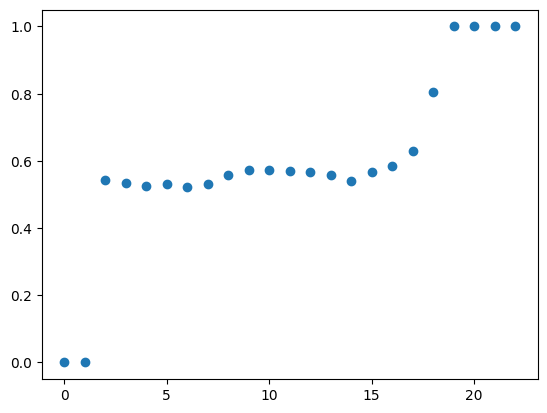

In [13]:
# It is pretty much the same if I focus on the 2010:2015 variables

nan_per_var = [rdata[var].isnull().sum() / len(rdata) for var in variables]
plt.scatter(range(len(nan_per_var)),nan_per_var)
plt.show()


In [155]:
np.array(nan_per_var) >= 1

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True,  True,  True,  True])

In [14]:
# There is no information at all in years : 2017 to 2030
rdata = rdata.loc[:, 'Country Name':'2016']
# and variables become
variables = variables[:-4]

In [157]:
rdata.to_csv('rdata-2000-2016.csv')

In [4]:
rdata = pd.read_csv('rdata-2000-2016.csv')

with open('relevant_indicators.txt') as fin:
    indicators = [indicator.strip(' -\n') for indicator in fin]
    
# lets create sub-dataframes by indicators.
names = ['internet_users',
         'population_age_secondary',
         'enrolment_secondary',
         'enrolment_tertiary',
         'GDP_per_capita',
         'government_expenditure_on_education',
         'graduates_from_tertiary',
         'labor_force_advanced_education',
         'labor_force_inter_education',
         'personal_computers',
         'technology_lvl_one',
         'technology_lvl_two',
         'technology_lvl_three']

for n in range(len(names)):
    exec(names[n]
         + ' = rdata.loc[rdata["Indicator Name"] == "'
         + indicators[n] 
         +'", :].copy()')

In [5]:
technology_lvl_one.head(2)

,Unnamed: 0,Country Name,Indicator Name,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
1900,130374,Australia,PIAAC: Adults by proficiency level in problem ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28.887065,NaN,NaN,NaN,NaN
1901,134039,Austria,PIAAC: Adults by proficiency level in problem ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.856625,NaN,NaN,NaN,NaN


In [6]:
# Let's compute NaN percentages for each subdataframe
for name in names:
    N = np.product(eval(name).shape)
    NaN_n = eval(name).loc[:, '2000':'2016'].isnull().sum().sum()
    NaN_percentage =  round(NaN_n / N, 2)
    print('-' * 30)
    print(f'percentage of NaN for {name} : {NaN_percentage}')

------------------------------
percentage of NaN for internet_users : 0.02
------------------------------
percentage of NaN for population_age_secondary : 0.03
------------------------------
percentage of NaN for enrolment_secondary : 0.23
------------------------------
percentage of NaN for enrolment_tertiary : 0.28
------------------------------
percentage of NaN for GDP_per_capita : 0.03
------------------------------
percentage of NaN for government_expenditure_on_education : 0.36
------------------------------
percentage of NaN for graduates_from_tertiary : 0.43
------------------------------
percentage of NaN for labor_force_advanced_education : 0.43
------------------------------
percentage of NaN for labor_force_inter_education : 0.44
------------------------------
percentage of NaN for personal_computers : 0.53
------------------------------
percentage of NaN for technology_lvl_one : 0.8
------------------------------
percentage of NaN for technology_lvl_two : 0.8
------------

In [169]:
# Let's remove rows with less than one numeric value.
# We put thresh at 3, because the firsts two variables are non-NaN.
for name in names:
    eval(name).dropna(thresh=3, inplace=True)
    print(f"{eval(name).shape} : {name}")

(230, 19) : internet_users
(223, 19) : population_age_secondary
(225, 19) : enrolment_secondary
(219, 19) : enrolment_tertiary
(234, 19) : GDP_per_capita
(183, 19) : government_expenditure_on_education
(171, 19) : graduates_from_tertiary
(99, 19) : labor_force_advanced_education
(100, 19) : labor_force_inter_education
(216, 19) : personal_computers
(26, 19) : technology_lvl_one
(26, 19) : technology_lvl_two
(26, 19) : technology_lvl_three


In [200]:
# I should have filtered in the rdata before sub-dataframing.
rdata.dropna(thresh=3, inplace=True)

In [236]:
rdata.to_csv('rdata-2000-2016.csv')

### let's assume that launching a business in a very small country is heavy administration wise for low profit returns. 

- We want to take a better look at the population of interest and discard small countries.
- Let's remember, that a huge population aged to be in secondary but which is not enrolled in secondary would not be interesting. So we will have to check that number.
- **note-to-self** : Refining commentaries of that part, I realize, after studying it, that the indicator 'population age secondary' is useless. It would have been of use if I had attendance *rate* to confront! but I actually have enrolment numbers... So I should have studied that directly.

#### population_age_secondary analysis.

In [8]:
population_age_secondary['2016'].isnull().sum()

65

In [9]:
population_age_secondary['2015'].isnull().sum()

22

In [10]:
population_age_secondary['2014'].isnull().sum()

2

In [55]:
# I will take the max on those 3 years to sort countries 
# because demography is globally in extension.
population_age_secondary['max'] = (population_age_secondary
                                   .loc[:,'2014':'2016']
                                   .apply(np.max, axis=1))

In [12]:
population_age_secondary['max'].isnull().sum()

1

In [13]:
population_age_secondary.loc[:,['2014','2015','2016','max']].head(20)

,2014,2015,2016,max
230,43786276.0,NaN,NaN,43786276.0
231,175370928.0,NaN,NaN,175370928.0
232,161641072.0,NaN,NaN,161641072.0
233,25179952.0,NaN,NaN,25179952.0
234,73745552.0,NaN,NaN,73745552.0
235,37008392.0,NaN,NaN,37008392.0
236,37933412.0,NaN,NaN,37933412.0
237,97452336.0,NaN,NaN,97452336.0
238,85289120.0,84409520.0,NaN,85289120.0
239,68165984.0,NaN,NaN,68165984.0


In [56]:
population_age_secondary.sort_values(by='max', axis=0, ascending=False, inplace=True)

In [15]:
population_age_secondary.head(5)

,Unnamed: 0,Country Name,Indicator Name,2000,2001,2002,2003,2004,2005,2006,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,max
254,90283,World,Population of the official age for secondary e...,753751296.0,767965120.0,780104064.0,789572672.0,795721152.0,797513216.0,794880832.0,...,781339776.0,776230912.0,769886784.0,765544576.0,761221632.0,759494336.0,757088256.0,757895040.0,NaN,757895040.0
242,46303,Low & middle income,Population of the official age for secondary e...,662181312.0,676455872.0,688435072.0,697794944.0,703991872.0,705974336.0,703580992.0,...,690864704.0,686254400.0,681004864.0,677388864.0,673891264.0,673265664.0,671264320.0,NaN,NaN,671264320.0
247,64628,Middle income,Population of the official age for secondary e...,603884224.0,616432960.0,626887296.0,634512576.0,638856576.0,639069312.0,634852544.0,...,618334080.0,611636352.0,603622272.0,597360256.0,591589696.0,588286080.0,584499136.0,583747392.0,NaN,584499136.0
244,53633,Lower middle income,Population of the official age for secondary e...,334839392.0,339299712.0,342549536.0,346377536.0,349159072.0,352433920.0,354782016.0,...,357639392.0,359266464.0,360921856.0,362785024.0,364612256.0,366555712.0,367710816.0,370001280.0,NaN,370001280.0
250,75623,South Asia,Population of the official age for secondary e...,211756144.0,214843424.0,217290112.0,219662432.0,221709440.0,223488992.0,224959200.0,...,227716528.0,229230208.0,230846176.0,232414992.0,233805232.0,235169200.0,236431664.0,NaN,NaN,236431664.0


In [16]:
# Above, regions are included. I want to discard it.
# I search for difference between regions and countries.
display(country.head(1))
country.columns

,Country Code,Short Name,Table Name,Long Name,2-alpha code,Currency Unit,Special Notes,Region,Income Group,WB-2 code,...,IMF data dissemination standard,Latest population census,Latest household survey,Source of most recent Income and expenditure data,Vital registration complete,Latest agricultural census,Latest industrial data,Latest trade data,Latest water withdrawal data,Unnamed: 31
0,ABW,Aruba,Aruba,Aruba,AW,Aruban florin,SNA data for 2000-2011 are updated from offici...,Latin America & Caribbean,High income: nonOECD,AW,...,NaN,2010,NaN,NaN,Yes,NaN,NaN,2012.0,NaN,NaN


Index(['Country Code', 'Short Name', 'Table Name', 'Long Name', '2-alpha code',
       'Currency Unit', 'Special Notes', 'Region', 'Income Group', 'WB-2 code',
       'National accounts base year', 'National accounts reference year',
       'SNA price valuation', 'Lending category', 'Other groups',
       'System of National Accounts', 'Alternative conversion factor',
       'PPP survey year', 'Balance of Payments Manual in use',
       'External debt Reporting status', 'System of trade',
       'Government Accounting concept', 'IMF data dissemination standard',
       'Latest population census', 'Latest household survey',
       'Source of most recent Income and expenditure data',
       'Vital registration complete', 'Latest agricultural census',
       'Latest industrial data', 'Latest trade data',
       'Latest water withdrawal data', 'Unnamed: 31'],
      dtype='object')

In [17]:
country['Other groups'].unique()

array([nan, 'HIPC', 'Euro area'], dtype=object)

In [18]:
country['Income Group'].unique()

array(['High income: nonOECD', 'Low income', 'Upper middle income', nan,
       'Lower middle income', 'High income: OECD'], dtype=object)

In [19]:
country['Region'].unique()

array(['Latin America & Caribbean', 'South Asia', 'Sub-Saharan Africa',
       'Europe & Central Asia', nan, 'Middle East & North Africa',
       'East Asia & Pacific', 'North America'], dtype=object)

In [20]:
region_names = country.loc[country['Region'].isnull()]['Table Name']
print(region_names)
print(len(region_names))

5                                          Arab World
57                                East Asia & Pacific
58            East Asia & Pacific (all income levels)
59                              Europe & Central Asia
60          Europe & Central Asia (all income levels)
63                                          Euro area
68                                     European Union
78                                          Gibraltar
89                                        High income
92             Heavily indebted poor countries (HIPC)
116                         Latin America & Caribbean
122     Latin America & Caribbean (all income levels)
123      Least developed countries: UN classification
124                                        Low income
127                               Lower middle income
128                               Low & middle income
140    Middle East & North Africa (all income levels)
143                                     Middle income
148                        M

In [21]:
country_names = country.loc[~country['Region']
                            .isnull()]['Table Name'].values
print(country_names)
print(len(country_names))

['Aruba' 'Afghanistan' 'Angola' 'Albania' 'Andorra' 'United Arab Emirates'
 'Argentina' 'Armenia' 'American Samoa' 'Antigua and Barbuda' 'Australia'
 'Austria' 'Azerbaijan' 'Burundi' 'Belgium' 'Benin' 'Burkina Faso'
 'Bangladesh' 'Bulgaria' 'Bahrain' 'Bahamas, The' 'Bosnia and Herzegovina'
 'Belarus' 'Belize' 'Bermuda' 'Bolivia' 'Brazil' 'Barbados'
 'Brunei Darussalam' 'Bhutan' 'Botswana' 'Central African Republic'
 'Canada' 'Switzerland' 'Channel Islands' 'Chile' 'China' "Côte d'Ivoire"
 'Cameroon' 'Congo, Dem. Rep.' 'Congo, Rep.' 'Colombia' 'Comoros'
 'Cabo Verde' 'Costa Rica' 'Cuba' 'Curaçao' 'Cayman Islands' 'Cyprus'
 'Czech Republic' 'Germany' 'Djibouti' 'Dominica' 'Denmark'
 'Dominican Republic' 'Algeria' 'Ecuador' 'Egypt, Arab Rep.' 'Eritrea'
 'Spain' 'Estonia' 'Ethiopia' 'Finland' 'Fiji' 'France' 'Faeroe Islands'
 'Micronesia, Fed. Sts.' 'Gabon' 'United Kingdom' 'Georgia' 'Ghana'
 'Guinea' 'Gambia, The' 'Guinea-Bissau' 'Equatorial Guinea' 'Greece'
 'Grenada' 'Greenland' 'Guatem

In [57]:
# Nice, here I found a decent criteria to filter non-country entity
population_age_secondary = (population_age_secondary
                            .loc[population_age_secondary['Country Name']
                                 .isin(country_names)
                                 ]
                            )

# I create a dataframe with index = country name, and the max value on
# 2014-2016 to represent the country.
# I will create dataframe with index = country name for each indicator,
# so i can join them easily. It will ease the score computation at the end.
dfdata = population_age_secondary['max'].values
dfindex = population_age_secondary['Country Name'].values
dfcol = ['population_age_secondary']

population_age_secondary_processed = pd.DataFrame(data=dfdata,
                                                  index=dfindex,
                                                  columns=dfcol)


In [58]:
display(population_age_secondary_processed.head(20))
display(population_age_secondary_processed.tail(20))
display(population_age_secondary_processed.describe())
# Let's remember that this contains a value which is the max
# of the period 2014-2016. It could be relevant to try to fit 
# a linear model on those lasts values to assess the value in 2022.

,population_age_secondary
India,175129728.0
China,94020824.0
Indonesia,27933138.0
Pakistan,27125616.0
United States,24834576.0
Nigeria,24779872.0
Brazil,23761384.0
Bangladesh,22930938.0
Ethiopia,14634765.0
Mexico,14349383.0


,population_age_secondary
Maldives,31513.0
Samoa,30796.0
Barbados,19027.0
Tonga,17097.0
Kiribati,16235.0
"Micronesia, Fed. Sts.",15717.0
St. Lucia,15691.0
St. Vincent and the Grenadines,9879.0
Grenada,9654.0
Seychelles,9194.0


,population_age_secondary
count,1.910000e+02
mean,3.983108e+06
std,1.490742e+07
min,1.412000e+03
25%,1.929295e+05
50%,7.705740e+05
75%,2.895866e+06
max,1.751297e+08


In [59]:
population_age_secondary_processed.to_csv('population_age_secondary_processed.csv', index_label='country')


In [6]:
print(rdata['Country Name'].value_counts().shape)
print(len(country_names))
# 241 helped verify there is no extra country name format 
# from those found in the variable country_names.
# Thus, I can filter rdata with country_names without losing information

(208,)
214


In [3]:
############ A CELL TO RESET MY NOTEBOOK WORKSPACE ##########

# rdata with no NaN-rows.
rdata = pd.read_csv('rdata-2000-2016.csv')

# A tip to filter countries previously found.
country_names = (country
                 .loc[~country['Region'].isnull()]
                 ['Table Name'].values)

# I discard regions from rdata.
rdata = rdata.loc[rdata['Country Name'].isin(country_names)]

# Variables kept in order to study markets for Academy.
variables = ['Country Name', 'Indicator Name']
variables.extend(str(n) for n in range(2000, 2016+1))

with open('relevant_indicators.txt') as fin:
    indicators = [indicator.strip(' -\n') for indicator in fin]

# lets create sub-dataframes by indicators with no-NaN-rows.
names = ['internet_users',
         'population_age_secondary',
         'enrolment_secondary',
         'enrolment_tertiary',
         'GDP_per_capita',
         'government_expenditure_on_education',
         'graduates_from_tertiary',
         'labor_force_advanced_education',
         'labor_force_inter_education',
         'personal_computers',
         'technology_lvl_one',
         'technology_lvl_two',
         'technology_lvl_three']

for n in range(len(names)):
    exec(names[n]
         + ' = rdata.loc[rdata["Indicator Name"] == "'
         + indicators[n] 
         +'", :].copy()')

population_age_secondary_processed = pd.read_csv('population_age_secondary_processed.csv')

### Enrolment in secondary and tertia

In [4]:
enrolment_secondary['2015'].isnull().sum()

74

In [5]:
enrolment_secondary['2010'].isnull().sum()

44

In [6]:
enrolment_secondary['2016'].isnull().sum()

186

In [7]:
enrolment_secondary['2005'].isnull().sum()

38

In [8]:
#As seen before, enrolment_secondary is less well provided than
# population_age_secondary
# Lets find out, how it evolves "globally"

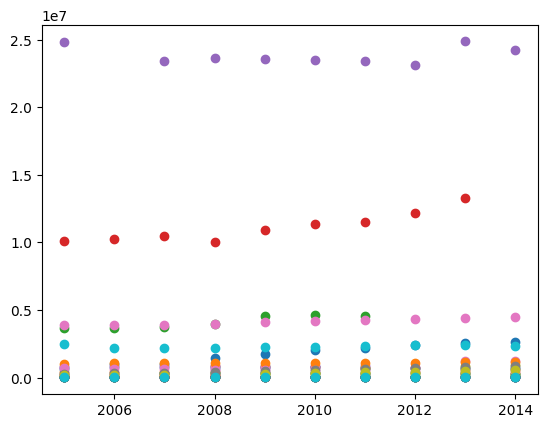

In [9]:
ys = enrolment_secondary.iloc[:30].loc[:,'2005':'2014']
x = np.arange(2005,2015)
for ind, y in ys.iterrows():
    plt.scatter(x,y)
    
plt.show()

In [10]:
# It seems to be linear, and quite flat. With a major trend to grow.
# So, once again the max of every measures could be reasonable to 
# sum up data trends. 
# 
# However, some country have only a very few measures and are 
# decreasing...
#
# Taking the last value available seems to be a good choice.

# As experienced below, I can use the ffill method
a = enrolment_tertiary.iloc[14, :] # randomly chosen.

# ffill() for forward fill() , same as fillna(method='ffill')
# propagates last valid observation forward until reaching the
# next valid.
b = enrolment_tertiary.iloc[14, :].ffill()

display(pd.DataFrame(zip(a,b), index=enrolment_tertiary.columns))

,0,1
Unnamed: 0,147804,147804
Country Name,Bangladesh,Bangladesh
Indicator Name,"Enrolment in tertiary education, all programme...","Enrolment in tertiary education, all programme..."
2000,726701.0,726701.0
2001,878537.0,878537.0
2002,855339.0,855339.0
2003,877335.0,877335.0
2004,821364.0,821364.0
2005,911600.0,911600.0
2006,1053566.0,1053566.0


In [20]:
# Thus, the last valid value is expanded until the last value.

# To assess reliability quality, I'd like to get the last valid index
# so I know the date of the last observation.
# I am sure it exists because I've already dropped rows without 
# numeric values.
enrolment_tertiary.iloc[14, :].last_valid_index()


'2014'

In [12]:
# lets apply this to all indicators
rdata['y_observation'] = rdata.apply(pd.Series.last_valid_index, axis=1)
rdata['last_observation'] = rdata.ffill(axis=1)['2016']
# The order of these lines matters!


In [69]:
rdata.loc[:, '2012':'last_observation'].tail(10)

,2012,2013,2014,2015,2016,y_observation,last_observation
1968,NaN,NaN,NaN,10.173078,NaN,2015,10.173078
1969,6.071813,NaN,NaN,NaN,NaN,2012,6.071813
1970,3.844871,NaN,NaN,NaN,NaN,2012,3.844871
1971,5.542082,NaN,NaN,NaN,NaN,2012,5.542082
1972,NaN,NaN,NaN,7.714555,NaN,2015,7.714555
1973,2.867798,NaN,NaN,NaN,NaN,2012,2.867798
1974,NaN,NaN,NaN,3.709745,NaN,2015,3.709745
1975,8.772420,NaN,NaN,NaN,NaN,2012,8.77242
1976,NaN,NaN,NaN,0.925009,NaN,2015,0.925009
1977,5.097860,NaN,NaN,NaN,NaN,2012,5.09786


In [15]:
rdata.columns

Index(['Unnamed: 0', 'Country Name', 'Indicator Name', '2000', '2001', '2002',
       '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011',
       '2012', '2013', '2014', '2015', '2016', 'y_observation',
       'last_observation'],
      dtype='object')

In [16]:
display(pd.DataFrame(rdata.groupby(['Country Name','Indicator Name'])['last_observation'].max()))

last_observation
Country Name Indicator Name                                                      
Afghanistan  Enrolment in secondary education, both sexes (n...      2.698816e+06
             Enrolment in tertiary education, all programmes...      2.628740e+05
             GDP per capita (current US$)                            5.617787e+02
             Government expenditure on education as % of GDP...      3.317540e+00
             Graduates from tertiary education, both sexes (...      2.431500e+04
...                                                                           ...
Zimbabwe     Government expenditure on education as % of GDP...      8.429330e+00
             Graduates from tertiary education, both sexes (...      3.325500e+04
             Internet users (per 100 people)                         2.311999e+01
             Personal computers (per 100 people)                     7.431140e+00
             Population of the official age for secondary ed...      2.069539e+06

[1777 rows x 1 columns]

In [17]:
indicators_per_country = rdata.pivot_table(index='Country Name',
                                           columns='Indicator Name',
                                           values='last_observation',
                                           aggfunc=max)

y_observation_per_country= rdata.pivot_table(index='Country Name',
                                           columns='Indicator Name',
                                           values='y_observation',
                                           aggfunc=max)

In [72]:
# y_observation_per_country contains labels, so object type. I cast it.
for col in y_observation_per_country.columns:
    pd.to_numeric(y_observation_per_country[col])
                                                         

In [73]:
y_observation_per_country.dtypes

Indicator Name
Enrolment in secondary education, both sexes (number)                                                 float64
Enrolment in tertiary education, all programmes, both sexes (number)                                  float64
GDP per capita (current US$)                                                                          float64
Government expenditure on education as % of GDP (%)                                                   float64
Graduates from tertiary education, both sexes (number)                                                float64
Internet users (per 100 people)                                                                       float64
Labor force with advanced education (% of total)                                                      float64
Labor force with intermediate education (% of total)                                                  float64
PIAAC: Adults by proficiency level in problem solving in technology-rich environments (%). Level 1    flo

In [65]:
y_observation_per_country['mean'] = (y_observation_per_country
                                     .mean(axis='columns',numeric_only=True))
# does not work because of type?
y_observation_per_country['median'] = (y_observation_per_country
                                       .median(axis='columns'))
                                               

In [67]:
y_observation_per_country.tail()

Indicator Name,"Enrolment in secondary education, both sexes (number)","Enrolment in tertiary education, all programmes, both sexes (number)",GDP per capita (current US$),Government expenditure on education as % of GDP (%),"Graduates from tertiary education, both sexes (number)",Internet users (per 100 people),Labor force with advanced education (% of total),Labor force with intermediate education (% of total),PIAAC: Adults by proficiency level in problem solving in technology-rich environments (%). Level 1,PIAAC: Adults by proficiency level in problem solving in technology-rich environments (%). Level 2,PIAAC: Adults by proficiency level in problem solving in technology-rich environments (%). Level 3,Personal computers (per 100 people),"Population of the official age for secondary education, both sexes (number)",mean,median
Country Name,,,,,,,,,,,,,,,
Virgin Islands (U.S.),NaN,2007.0,2015.0,NaN,2007.0,2016.0,NaN,NaN,NaN,NaN,NaN,2005.0,NaN,2010.000000,2008.500000
West Bank and Gaza,2015.0,2015.0,2016.0,2015.0,2015.0,2016.0,2013.0,2013.0,NaN,NaN,NaN,2005.0,2015.0,2013.800000,2015.000000
"Yemen, Rep.",2013.0,2011.0,2016.0,2008.0,2007.0,2016.0,NaN,NaN,NaN,NaN,NaN,2006.0,2015.0,2011.500000,2011.500000
Zambia,NaN,2012.0,2016.0,2008.0,NaN,2016.0,NaN,NaN,NaN,NaN,NaN,2005.0,2016.0,2012.166667,2012.166667
Zimbabwe,2013.0,2015.0,2016.0,2014.0,2015.0,2016.0,NaN,NaN,NaN,NaN,NaN,2008.0,2016.0,2014.125000,2015.000000
